In [4]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import transform, morphology

In [57]:
def shape_aa(
    structuring_element, target_shape
) -> np.ndarray:
    """Resize the filter to the desired shape and smooth it if required."""
    return transform.resize(
        structuring_element,
        target_shape,
        preserve_range=True,
        anti_aliasing=True,
    )
    
def center_in(
    center: np.ndarray, filter_shape, dtype: str = "float64"
) -> np.ndarray:
    """Pad the computed center form to match the desired filter shape."""
    pad_before = (filter_shape[0] - center.shape[0]) // 2, (
        filter_shape[1] - center.shape[1]
    ) // 2
    pad_after = filter_shape[0] - pad_before[0], filter_shape[1] - pad_before[1]

    centered = np.zeros(shape=filter_shape, dtype=dtype)
    centered[
        pad_before[0] : pad_after[0], pad_before[1] : pad_after[1]
    ] = center

    return centered


float64


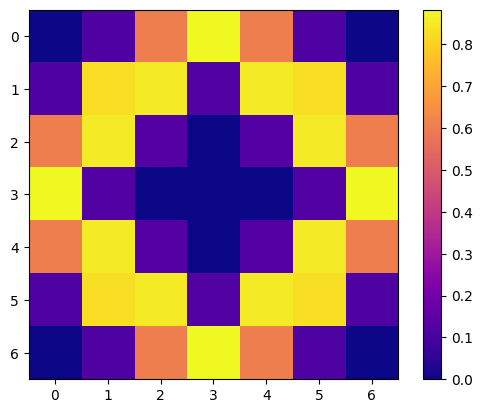

In [59]:
draw(0)

In [93]:
def draw_cross(size, shape=None, dtype="float64"):
    res = np.zeros((size, size), dtype=dtype)
    res[size // 2, :] = 1.0
    res[:, size // 2] = 1.0
    if shape is not None:
        return center_in(res, shape, dtype=dtype)
    return res

def draw_disk(radius, shape=None, dtype="float64"):
    from skimage import morphology

    res = morphology.disk(radius).astype(dtype)
    if shape is not None:
        return center_in(res, shape)
    return res


def draw_diamond(radius, shape=None, dtype="float64"):
    from skimage import morphology

    res = morphology.diamond(radius).astype(dtype)
    if shape is not None:
        return center_in(res, shape)
    return res

def center_in(arr, shape, dtype="float64"):
    res = np.zeros(shape=shape, dtype=dtype)
    pad_before = (shape[0] - arr.shape[0]) // 2, (shape[1] - arr.shape[1]) // 2
    pad_after = shape[0] - pad_before[0], shape[1] - pad_before[1]
    res[pad_before[0] : pad_after[0], pad_before[1] : pad_after[1]] = arr
    return res


def shape_aa(original, target_shape):
    from skimage import transform

    return transform.resize(
        original, target_shape, preserve_range=True, anti_aliasing=True
    )


def draw_disk_aa(radius, shape=None, dtype="float64"):
    from skimage import transform

    dim = radius * 2 + 1
    res = draw_disk(dim, dtype=dtype)
    res = shape_aa(res, (dim, dim))

    if shape is not None:
        return center_in(res, shape)
    return res


def draw_diamond_aa(radius, shape=None, dtype="float64"):
    dim = radius * 2 + 1
    res = draw_diamond(dim, dtype=dtype)
    res = shape_aa(res, (dim, dim))

    if shape is not None:
        return center_in(res, shape, dtype=dtype)
    return res


def draw_complex(shape=None, dtype="float64"):
    return draw_disk_aa(3, shape, dtype=dtype) \
           - draw_diamond_aa(2, shape, dtype=dtype)

In [113]:
def draw(radius):
    res = draw_diamond_aa(radius, (7, 7))
    name = f"diamondaa{radius}_7"
    np.save(name + ".npy", res)
    plt.imshow(res, cmap="plasma")
    plt.colorbar()
    plt.savefig(name + ".png")
    print(res.dtype)

    plt.imshow(res, cmap="plasma")
    plt.show()

float64


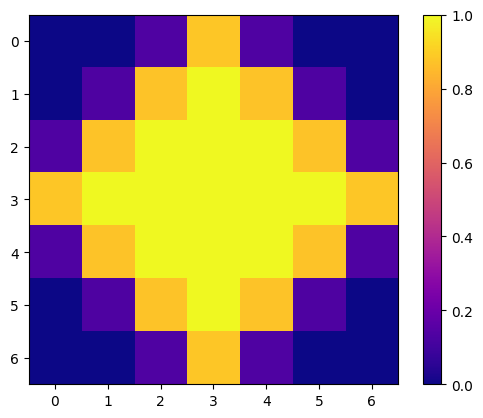

In [114]:
draw(3)

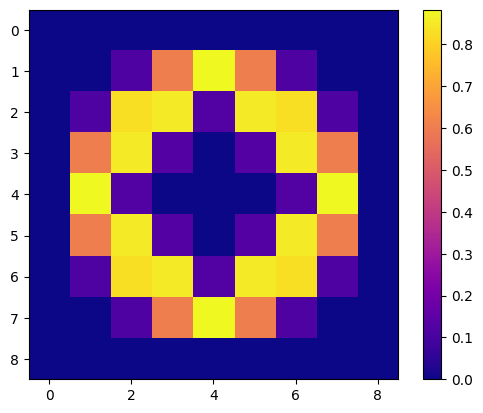

In [39]:
plt.imshow(draw_complex((9, 9)), cmap="plasma")
plt.colorbar()

In [3]:
import torchvision
from scipy import ndimage

In [4]:
data = torchvision.datasets.MNIST("../mnist/", train=False).data

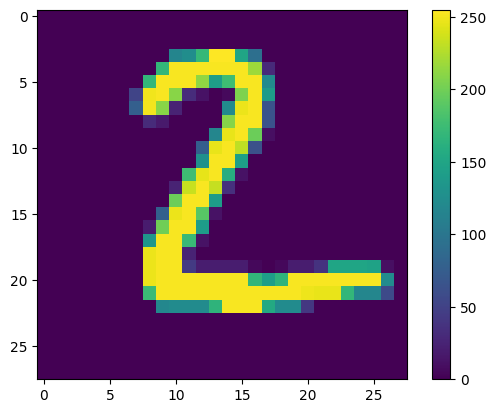

In [5]:
plt.imshow(data[1])
plt.colorbar()

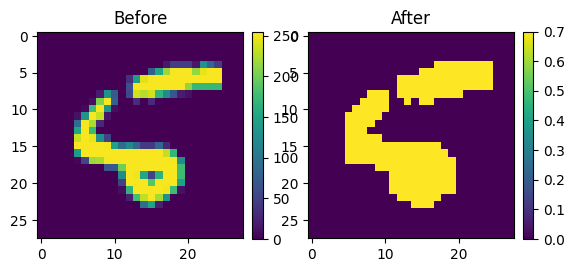

In [66]:
fig = plt.figure()
ax = fig.add_subplot(1, 2, 1)
imgplot = plt.imshow(data[8])
ax.set_title('Before')
plt.colorbar(fraction=0.046, pad=0.04)
ax = fig.add_subplot(1, 2, 2)
imgplot = plt.imshow(data[8])
imgplot.set_clim(0.0, 0.7)
ax.set_title('After')
plt.colorbar(fraction=0.046, pad=0.04)

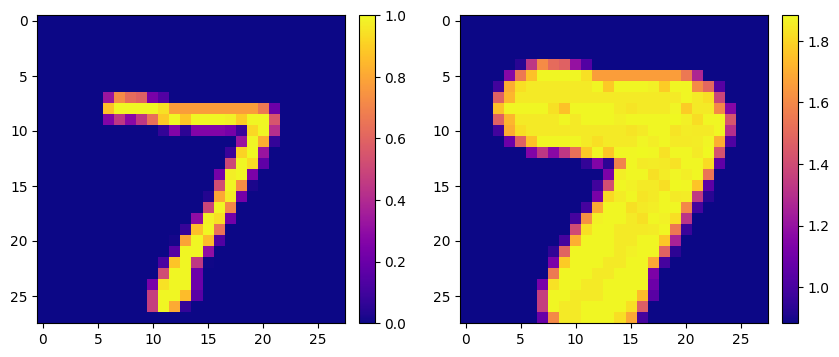

In [89]:
img = np.array(data[0]).astype(np.float64) / 255
sel = draw_complex((7, 7))

res = ndimage.grey_dilation(img, structure=sel)
res = np.array(res)

plt.figure(figsize=(10, 4))
plt.subplot(121)
plt.imshow(img, cmap="plasma")
plt.colorbar(fraction=0.046, pad=0.04)

plt.subplot(122)
plt.imshow(res, cmap="plasma")
plt.colorbar(fraction=0.046, pad=0.04)

plt.savefig("dilation.png")
np.save("image_dilation.npy", img)
np.save("dilation.npy", res)

(10, 1, 28, 28) (10, 1, 28, 28)


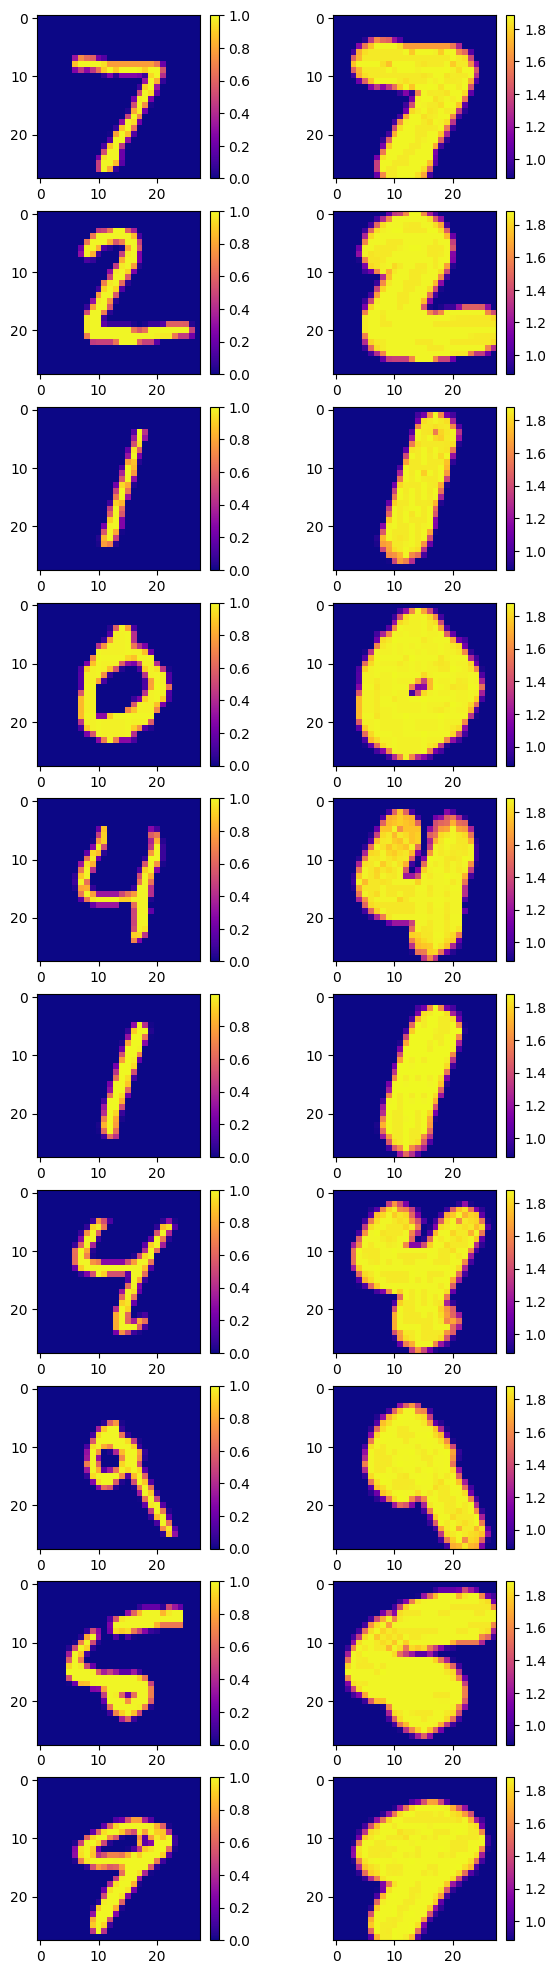

In [91]:
sel = draw_complex((7, 7))

n = 10
i = 0
f = 0
res = []
res_img = []

while f < n:
    img = np.array(data[i]).astype(np.float64) / 255
    tmp = ndimage.grey_dilation(img, structure=sel)
    if tmp.min() != tmp.max():
        res.append(np.array(tmp).reshape(1, 28, 28))
        res_img.append(img.reshape(1, 28, 28))
        f += 1

    i += 1

res = np.array(res)
res_img = np.array(res_img)

print(res.shape, res_img.shape)

plt.figure(figsize=(7, 25))

for i in range(n):
    plt.subplot(n, 2, 1 + 2 * i)
    plt.imshow(res_img[i, 0], cmap="plasma")
    plt.colorbar(fraction=0.046, pad=0.04)
    plt.subplot(n, 2, 2 + + 2 * i)
    plt.imshow(res[i, 0], cmap="plasma")
    plt.colorbar(fraction=0.046, pad=0.04)

plt.savefig("dilations.png")
np.save("images_dilations.npy", res_img)
np.save("dilations.npy", res)

In [2]:
import pickle

dict_keys(['network_outputs', 'layers_weights'])
(1, 'SMorph', {'filter': tensor([[[[-0.8407, -0.2574, -0.7038,  0.4412, -0.7901, -0.8121, -0.8570],
          [-0.2475,  0.3728,  0.4271, -0.5022,  0.4065,  0.3587, -0.8471],
          [-0.7259,  0.4236, -0.3534, -0.5964, -0.3319,  0.4018, -0.8298],
          [ 0.4411, -0.3751, -0.4874, -0.4273, -0.6726, -0.2825,  0.4401],
          [-0.8204,  0.4050, -0.3744, -0.4845, -0.3526,  0.4259, -0.7865],
          [-0.8385,  0.3642,  0.4105, -0.3694,  0.4303,  0.3784, -0.8146],
          [-0.8665, -0.8405, -0.8172,  0.4402, -0.7019, -0.2344, -0.8495]]]]), 'alpha': tensor([[-30.7913]])})


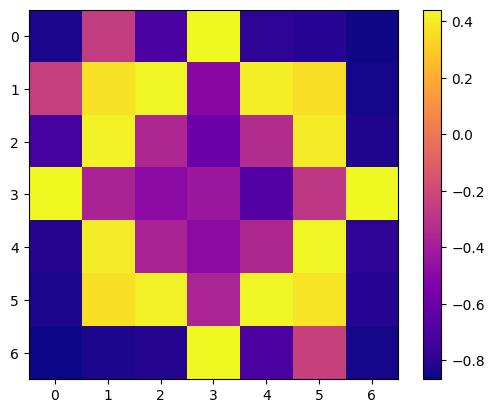

In [6]:
with open("/lrde/home2/rdi-2022/rhermary/update_morphonet/src/mlruns/0/64eaae47463b45e6a7f5b31592a0dc1e/artifacts/outputs/000629.pickle", "rb") as f:
    out = pickle.load(f)
    print(out.keys())
    # print(out['network_outputs'][-1][2])
    print(out['layers_weights'][1])
    # print(out['inputs'].shape)
    # plt.imshow(out['network_outputs'][-1][2][0, 0].cpu(), cmap="plasma")
    plt.imshow(out['layers_weights'][1][-1]['filter'].cpu().squeeze(), cmap="plasma")
    plt.colorbar()

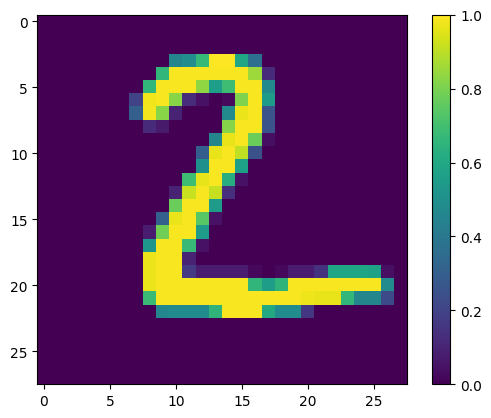

In [130]:
with open("/lrde/home2/rdi-2022/rhermary/update_morphonet/src/val_in.npy", "rb") as f:
    a = np.load(f)
    plt.imshow(a[1, 0])
    plt.colorbar()